PROBLEM STATEMENT-PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
seed = 7
np.random.seed(seed)
df=pd.read_csv('forestfires.csv')

In [3]:
df.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [4]:
df=df.drop(columns=['month','day'], axis=1)

In [5]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [6]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:
df.area.value_counts()

0.00     247
1.94       3
28.66      2
0.52       2
9.96       2
        ... 
2.21       1
7.36       1
0.24       1
6.84       1
35.88      1
Name: area, Length: 251, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

In [9]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['size_category']= label_encoder.fit_transform(df['size_category'])

In [10]:
X = df.drop('size_category', axis=1).values
y = df['size_category'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
import tensorflow as tf

In [13]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=42, activation='relu'))
ann.add(tf.keras.layers.Dense(units=28, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
# Compile model
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Fit the model
history=ann.fit(X_train,y_train, validation_split=0.33, epochs=180, batch_size=10)

Epoch 1/180
28/28 [==============================] - 1s 14ms/step - loss: 10.5303 - accuracy: 0.6775 - val_loss: 1.9311 - val_accuracy: 0.7664
Epoch 2/180
28/28 [==============================] - 0s 3ms/step - loss: 0.9975 - accuracy: 0.7391 - val_loss: 0.4255 - val_accuracy: 0.8686
Epoch 3/180
28/28 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.8442 - val_loss: 0.3469 - val_accuracy: 0.8686
Epoch 4/180
28/28 [==============================] - 0s 3ms/step - loss: 0.2901 - accuracy: 0.8986 - val_loss: 0.4623 - val_accuracy: 0.7518
Epoch 5/180
28/28 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8659 - val_loss: 0.3517 - val_accuracy: 0.8613
Epoch 6/180
28/28 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 0.9058 - val_loss: 0.2271 - val_accuracy: 0.9270
Epoch 7/180
28/28 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.9022 - val_loss: 0.1976 - val_accuracy: 0.9197
Epoch 8/180

Epoch 59/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9855 - val_loss: 0.1179 - val_accuracy: 0.9416
Epoch 60/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9783 - val_loss: 0.1184 - val_accuracy: 0.9416
Epoch 61/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9891 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 62/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0353 - val_accuracy: 0.9854
Epoch 63/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9710 - val_loss: 0.0510 - val_accuracy: 0.9781
Epoch 64/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9819 - val_loss: 0.0960 - val_accuracy: 0.9416
Epoch 65/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9783 - val_loss: 0.1051 - val_accuracy: 0.9562
Epoch 

28/28 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9964 - val_loss: 0.0574 - val_accuracy: 0.9708
Epoch 117/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9891 - val_loss: 0.0612 - val_accuracy: 0.9635
Epoch 118/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9964 - val_loss: 0.0742 - val_accuracy: 0.9635
Epoch 119/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9708
Epoch 120/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9708
Epoch 121/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.1034 - val_accuracy: 0.9708
Epoch 122/180
28/28 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9964 - val_loss: 0.0467 - val_accuracy: 0.9781
Epoch 123/180

28/28 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9964 - val_loss: 0.0317 - val_accuracy: 0.9781
Epoch 174/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0808 - val_accuracy: 0.9781
Epoch 175/180
28/28 [==============================] - ETA: 0s - loss: 1.0885e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9891 - val_loss: 0.1174 - val_accuracy: 0.9708
Epoch 176/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9708
Epoch 177/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9964 - val_loss: 0.0364 - val_accuracy: 0.9708
Epoch 178/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9708
Epoch 179/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_los

In [16]:
# evaluate the model
scores = ann.evaluate(X_train, y_train)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9879
accuracy: 98.79%


In [17]:
# evaluate the model
scores = ann.evaluate(X_test, y_test)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9423
accuracy: 94.23%


In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [19]:
hist_df = pd.DataFrame(history.history)
hist_df["epoch"]=history.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
175,0.005308,1.000000,0.052534,0.970803,175
176,0.008946,0.996377,0.036386,0.970803,176
177,0.003584,1.000000,0.042006,0.970803,177
178,0.003703,1.000000,0.044653,0.985401,178
179,0.009596,0.996377,0.079687,0.963504,179


In [20]:
ann.compile(loss="categorical_crossentropy",
              optimizer='rmsprop', metrics=["accuracy"])

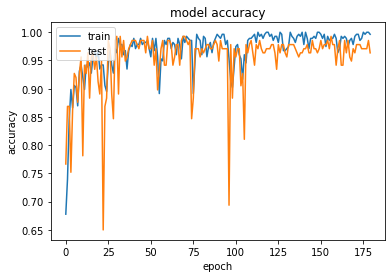

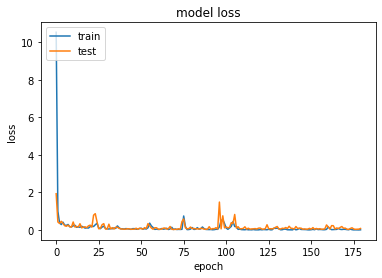

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Conclusion:

We have predicted the result with 94.23% accuracy here epoch=180

HYPER PARAMETER TUNING

In [22]:
X1 = df.drop('size_category', axis=1).values
y1 = df['size_category'].values

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Standardization
a = StandardScaler()
a.fit(X1)
X_standardized = a.transform(X1)

In [25]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [26]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X1)

In [27]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

Tuning set 1 : Batch Size and Epochs

In [28]:
def create_model():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=14,kernel_initializer='uniform', activation='relu'))
    ann.add(tf.keras.layers.Dense(units=12, kernel_initializer='uniform',activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    adam=Adam(lr=0.01) #learning rate = 0.01
    ann.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return ann

In [29]:
# Create the model
ann = KerasClassifier(build_fn = create_model,verbose = 0)


In [30]:
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,25,50,100]


In [31]:
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)


In [32]:
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = ann,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/12] END .................batch_size=10, epochs=10; total time=   1.7s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/12] END .................batch_size=10, epochs=10; total time=   1.5s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/12] END .................batch_size=10, epochs=10; total time=   1.9s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/12] END .................batch_size=10, epochs=10; total time=   2.1s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/12] END .................batch_size=10, epochs=10; total time=   1.7s
[CV 1/5; 2/12] START batch_size=10, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/12] END .................batch_size=10, epochs=25; total time=   2.4s
[CV 2/5; 2/12] START batch_size=10, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/12] END .................batch_size=10, epochs=25; total time=   2.8s
[CV 3/5; 2/12] START batch_size=10, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/12] END .................batch_size=10, epochs=25; total time=   2.6s
[CV 4/5; 2/12] START batch_size=10, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/12] END .................batch_size=10, epochs=25; total time=   2.2s
[CV 5/5; 2/12] START batch_size=10, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/12] END .................batch_size=10, epochs=25; total time=   2.5s
[CV 1/5; 3/12] START batch_size=10, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/12] END .................batch_size=10, epochs=50; total time=   3.7s
[CV 2/5; 3/12] START batch_size=10, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/12] END .................batch_size=10, epochs=50; total time=   3.4s
[CV 3/5; 3/12] START batch_size=10, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/12] END .................batch_size=10, epochs=50; total time=   3.6s
[CV 4/5; 3/12] START batch_size=10, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/12] END .................batch_size=10, epochs=50; total time=   3.7s
[CV 5/5; 3/12] START batch_size=10, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/12] END .................batch_size=10, epochs=50; total time=   3.7s
[CV 1/5; 4/12] START batch_size=10, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/12] END ................batch_size=10, epochs=100; total time=   6.4s
[CV 2/5; 4/12] START batch_size=10, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/12] END ................batch_size=10, epochs=100; total time=   6.6s
[CV 3/5; 4/12] START batch_size=10, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/12] END ................batch_size=10, epochs=100; total time=   6.3s
[CV 4/5; 4/12] START batch_size=10, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/12] END ................batch_size=10, epochs=100; total time=   6.4s
[CV 5/5; 4/12] START batch_size=10, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/12] END ................batch_size=10, epochs=100; total time=   6.2s
[CV 1/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/12] END .................batch_size=20, epochs=10; total time=   1.1s
[CV 2/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/12] END .................batch_size=20, epochs=10; total time=   1.1s
[CV 3/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/12] END .................batch_size=20, epochs=10; total time=   1.1s
[CV 4/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/12] END .................batch_size=20, epochs=10; total time=   1.1s
[CV 5/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/12] END .................batch_size=20, epochs=10; total time=   1.1s
[CV 1/5; 6/12] START batch_size=20, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/12] END .................batch_size=20, epochs=25; total time=   1.8s
[CV 2/5; 6/12] START batch_size=20, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/12] END .................batch_size=20, epochs=25; total time=   1.6s
[CV 3/5; 6/12] START batch_size=20, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/12] END .................batch_size=20, epochs=25; total time=   2.0s
[CV 4/5; 6/12] START batch_size=20, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/12] END .................batch_size=20, epochs=25; total time=   1.6s
[CV 5/5; 6/12] START batch_size=20, epochs=25...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/12] END .................batch_size=20, epochs=25; total time=   1.6s
[CV 1/5; 7/12] START batch_size=20, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/12] END .................batch_size=20, epochs=50; total time=   2.4s
[CV 2/5; 7/12] START batch_size=20, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/12] END .................batch_size=20, epochs=50; total time=   2.3s
[CV 3/5; 7/12] START batch_size=20, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/12] END .................batch_size=20, epochs=50; total time=   2.4s
[CV 4/5; 7/12] START batch_size=20, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/12] END .................batch_size=20, epochs=50; total time=   2.5s
[CV 5/5; 7/12] START batch_size=20, epochs=50...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/12] END .................batch_size=20, epochs=50; total time=   2.4s
[CV 1/5; 8/12] START batch_size=20, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/12] END ................batch_size=20, epochs=100; total time=   4.0s
[CV 2/5; 8/12] START batch_size=20, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/12] END ................batch_size=20, epochs=100; total time=   3.5s
[CV 3/5; 8/12] START batch_size=20, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/12] END ................batch_size=20, epochs=100; total time=   3.4s
[CV 4/5; 8/12] START batch_size=20, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/12] END ................batch_size=20, epochs=100; total time=   3.5s
[CV 5/5; 8/12] START batch_size=20, epochs=100..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/12] END ................batch_size=20, epochs=100; total time=   3.6s
[CV 1/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.0s
[CV 2/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.0s
[CV 3/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.0s
[CV 4/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.2s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.0s
[CV 1/5; 10/12] START batch_size=40, epochs=25..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 10/12] END ................batch_size=40, epochs=25; total time=   1.3s
[CV 2/5; 10/12] START batch_size=40, epochs=25..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 10/12] END ................batch_size=40, epochs=25; total time=   1.3s
[CV 3/5; 10/12] START batch_size=40, epochs=25..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 10/12] END ................batch_size=40, epochs=25; total time=   1.4s
[CV 4/5; 10/12] START batch_size=40, epochs=25..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 10/12] END ................batch_size=40, epochs=25; total time=   1.3s
[CV 5/5; 10/12] START batch_size=40, epochs=25..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 10/12] END ................batch_size=40, epochs=25; total time=   1.3s
[CV 1/5; 11/12] START batch_size=40, epochs=50..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 11/12] END ................batch_size=40, epochs=50; total time=   1.9s
[CV 2/5; 11/12] START batch_size=40, epochs=50..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 11/12] END ................batch_size=40, epochs=50; total time=   1.7s
[CV 3/5; 11/12] START batch_size=40, epochs=50..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 11/12] END ................batch_size=40, epochs=50; total time=   1.6s
[CV 4/5; 11/12] START batch_size=40, epochs=50..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 11/12] END ................batch_size=40, epochs=50; total time=   2.0s
[CV 5/5; 11/12] START batch_size=40, epochs=50..................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 11/12] END ................batch_size=40, epochs=50; total time=   1.6s
[CV 1/5; 12/12] START batch_size=40, epochs=100.................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 12/12] END ...............batch_size=40, epochs=100; total time=   2.4s
[CV 2/5; 12/12] START batch_size=40, epochs=100.................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 12/12] END ...............batch_size=40, epochs=100; total time=   2.7s
[CV 3/5; 12/12] START batch_size=40, epochs=100.................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 12/12] END ...............batch_size=40, epochs=100; total time=   2.4s
[CV 4/5; 12/12] START batch_size=40, epochs=100.................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 12/12] END ...............batch_size=40, epochs=100; total time=   2.4s
[CV 5/5; 12/12] START batch_size=40, epochs=100.................................


C:\Users\sanjana\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 12/12] END ...............batch_size=40, epochs=100; total time=   2.4s


In [33]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
#According to this, the best batch size is 20 and epochs is 50

Best : 0.9070761680603028, using {'batch_size': 20, 'epochs': 25}
0.8780059695243836,0.057928796257910184 with: {'batch_size': 10, 'epochs': 10}
0.8993465185165406,0.05544423982106186 with: {'batch_size': 10, 'epochs': 25}
0.9051717638969421,0.05702056171757638 with: {'batch_size': 10, 'epochs': 50}
0.8993465185165406,0.05544423982106186 with: {'batch_size': 10, 'epochs': 100}
0.8587191820144653,0.05138737054791336 with: {'batch_size': 20, 'epochs': 10}
0.9070761680603028,0.05019689541761551 with: {'batch_size': 20, 'epochs': 25}
0.8993278622627259,0.05483432057882714 with: {'batch_size': 20, 'epochs': 50}
0.9050784111022949,0.04762291291550233 with: {'batch_size': 20, 'epochs': 100}
0.8140590071678162,0.09034620523762077 with: {'batch_size': 40, 'epochs': 10}
0.8877147197723388,0.05347026792303918 with: {'batch_size': 40, 'epochs': 25}
0.9032113432884217,0.046510226111232844 with: {'batch_size': 40, 'epochs': 50}
0.9012509346008301,0.045531380122135395 with: {'batch_size': 40, 'epochs